In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
car=pd.read_csv('CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
car.loc[car.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [32]:
x = car[['fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
                     'carlength','carwidth']]
x.head(5)

,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [39]:
x.shape

(205, 13)

In [33]:
y=car['price']
y.head(5)

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [38]:
y.shape


(205,)

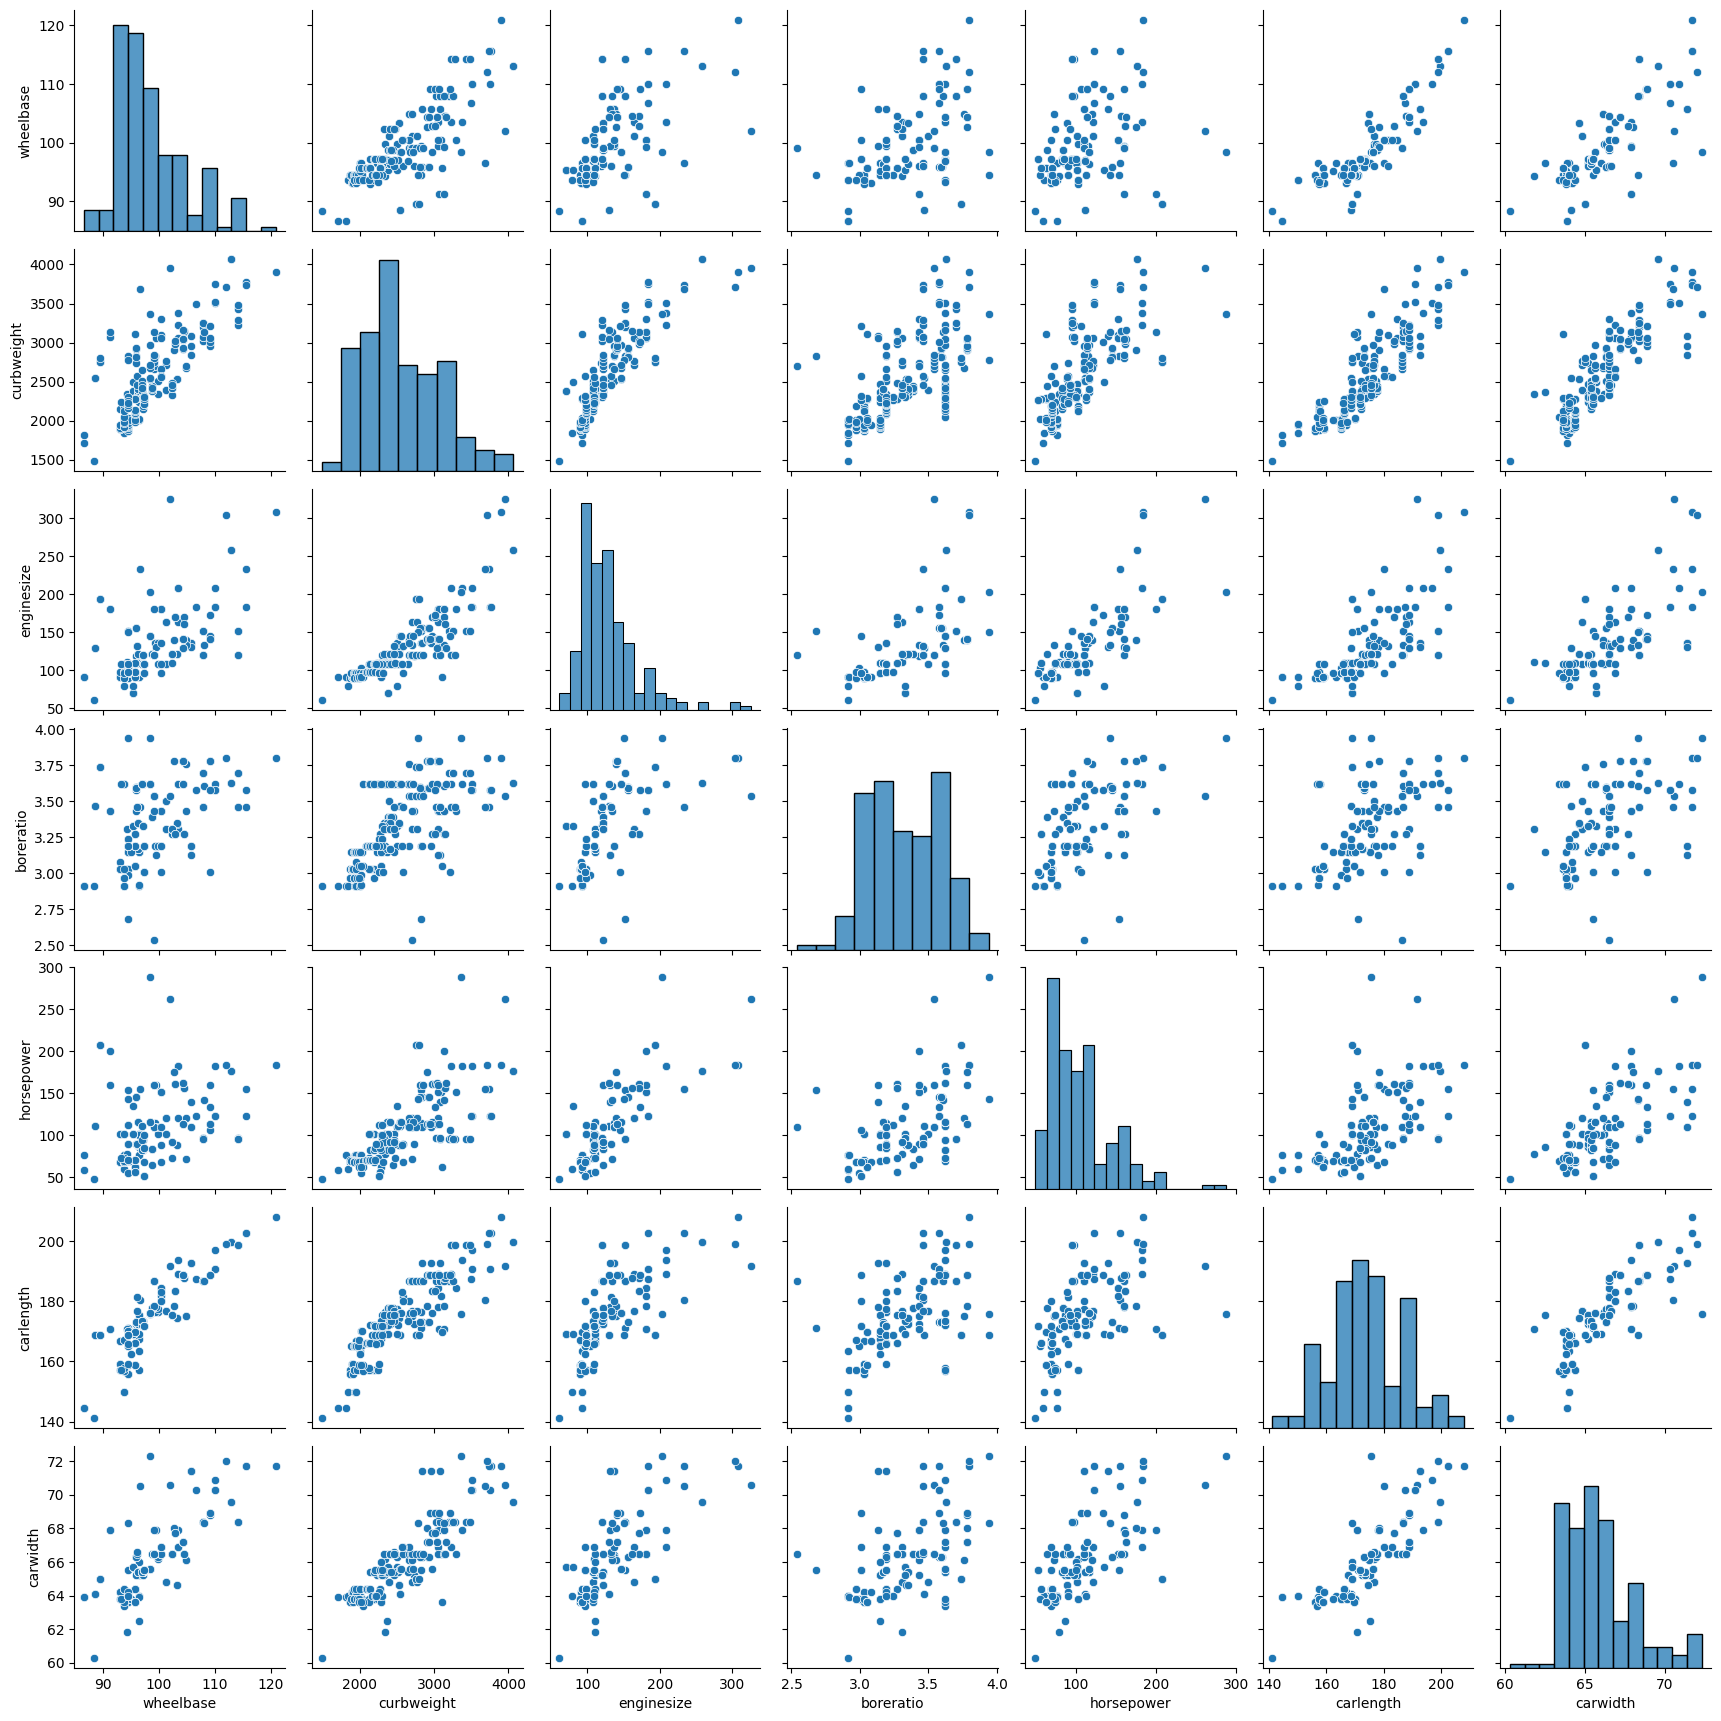

In [34]:
sns.pairplot(x)
plt.show()

In [40]:
df=pd.DataFrame(x)
def dummies(i,df):
    temp = pd.get_dummies(df[i], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([i], axis = 1, inplace = True)
    return df

In [41]:
x = dummies('fueltype',x)
x = dummies('aspiration',x)
x = dummies('carbody',x)
x = dummies('drivewheel',x)
x = dummies('enginetype',x)
x = dummies('cylindernumber',x)


In [43]:
x.shape

(205, 27)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 ,test_size = 0.3, random_state=42)


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [46]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

In [47]:
X_train.shape

(143, 27)

In [49]:
y_train.shape

(143, 1)

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
c=lr.intercept_
print(c)

[13408.5034965]


In [53]:
b=lr.coef_
print(b)

[[ 4.04400663e+02  2.50966313e+03  9.70264849e+02 -4.57760779e+02
   2.84691953e+03 -6.27192580e+02  1.29946515e+03 -3.48972457e+02
  -2.67087769e+02  2.39863085e+02 -1.67195765e+03 -1.22834870e+03
  -1.40742050e+03  2.02793125e+02  7.03423908e+02 -1.23312097e+03
   4.30248781e+00  1.06552162e+03  8.26901444e+02 -1.26869884e+03
  -5.44410586e+02 -2.13859384e+03 -5.67823631e+03 -3.51713633e+03
   0.00000000e+00 -7.52361711e+02 -5.44410586e+02]]


In [54]:
pred=lr.predict(X_test)
print(pred)

[[27764.68170965]
 [21219.63570672]
 [10733.72192955]
 [12172.08433223]
 [25829.77953978]
 [ 5469.46046039]
 [ 7504.69175537]
 [ 7541.70601697]
 [ 9921.8332983 ]
 [ 8879.56823157]
 [17361.85677482]
 [ 7342.05853128]
 [15887.47486725]
 [10910.98765959]
 [39490.75983991]
 [ 5272.94234771]
 [11447.19998089]
 [15913.21852541]
 [10716.36998903]
 [11348.21013305]
 [10940.2708891 ]
 [15943.06525245]
 [10589.51563099]
 [ 4056.3392834 ]
 [ 6819.49762922]
 [28842.02783445]
 [18453.19895033]
 [15233.20677721]
 [ 4490.29568307]
 [16536.37944182]
 [26588.14743385]
 [ 5611.26790586]
 [ 4840.64266414]
 [16517.66846969]
 [ 8234.68468502]
 [30355.60473939]
 [12264.90743732]
 [13022.3378079 ]
 [ 6479.16054483]
 [16344.73011936]
 [ 8276.55098115]
 [14307.30911642]
 [14731.2117978 ]
 [ 5203.3662346 ]
 [ 6312.02737773]
 [ 9111.0872555 ]
 [ 5611.26790586]
 [ 7103.90990314]
 [16507.86825715]
 [15773.41523305]
 [ 5208.25416645]
 [21991.45907051]
 [ 7211.91394579]
 [11588.87645589]
 [ 4427.61902805]
 [16367.81

Text(0, 0.5, 'predicted values')

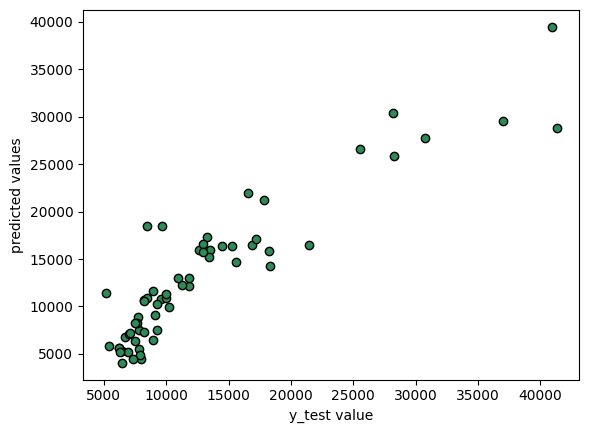

In [56]:
plt.scatter(y_test,pred,color="seagreen",edgecolor="black")
plt.xlabel("y_test value")
plt.ylabel("predicted values")


C:\Users\TUF\AppData\Local\Temp\ipykernel_19356\853782063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_train, hist = False, color = 'r', label = 'actual values')
C:\Users\TUF\AppData\Local\Temp\ipykernel_19356\853782063.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

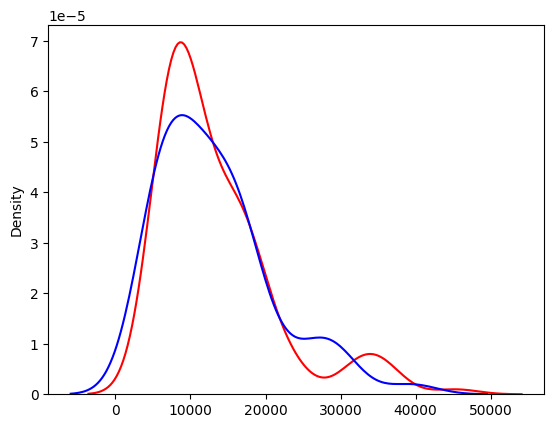

In [57]:
ax = sns.distplot(y_train, hist = False, color = 'r', label = 'actual values')
sns.distplot(pred, hist = False, color = 'b', label = 'fitted_values', ax = ax)

plt.show()

In [59]:
lr.score(X_test,y_test)

0.8367611417510576

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_absolute_error(y_test, pred)
print(f'Mean Absolute Error = {mse:.2f}')
rmse = mean_squared_error(y_test, pred, squared = False)
print(f'Root Mean Squared Error = {rmse:.2f}')
r2 = r2_score(y_test, pred)
print(f'R-Squared Score = {r2*100:.2f} %')

Mean Absolute Error = 2358.82
Root Mean Squared Error = 3363.02
R-Squared Score = 83.68 %
